In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\manoj\Downloads\cbsd_project\dataset.csv")

In [3]:
data.shape

(77687, 31)

In [4]:
data.head()

,Optimism,Search_for_motivation,Activity,Assertiveness,Sociability,Friendliness,Empathy,Confidentiality,Cooperation,Altruism,...,Stability,Coldness,Calm,Liberalism,Intellectuality,Audacity,Emotionality,Artistic_interests,Imagination,Condtion
0,15,12,14,12,13,15,18,15,14,14,...,15,14,8,10,15,10,13,14,16,H
1,18,17,16,12,18,12,11,17,15,12,...,10,16,12,13,12,17,13,16,17,H
2,16,8,16,17,15,19,15,13,13,17,...,19,20,17,14,19,17,18,15,14,H
3,18,9,17,14,11,17,17,14,12,12,...,19,20,19,10,18,15,17,14,14,H
4,16,9,17,13,10,17,17,15,12,18,...,19,19,18,10,17,17,18,14,12,H


In [5]:
X = data.iloc[:,0:30]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

[0.02454125 0.02730904 0.02996376 0.0220388  0.02424099 0.05392187
 0.02490407 0.02371647 0.0281273  0.02406822 0.03031327 0.03055985
 0.02280346 0.06904821 0.03937608 0.03131486 0.02809583 0.02436726
 0.03735016 0.02772658 0.03520757 0.0976653  0.05098707 0.03421949
 0.02217505 0.02092201 0.02158989 0.02256877 0.02082428 0.05005324]


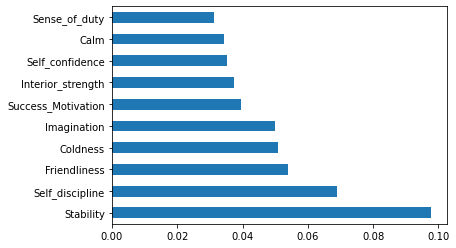

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs         Score
21           Stability  11809.349890
13     Self_discipline   9355.657990
22            Coldness   7960.465406
5         Friendliness   6079.372501
18   Interior_strength   5947.986779
23                Calm   5040.414428
20     Self_confidence   4556.162028
14  Success_Motivation   4412.701768
2             Activity   3238.796632
29         Imagination   2968.938437


Between above 2 feature selection models Activity in the select Kbest and confidence in the extra tree classifier model has been changed

In [8]:
df = data.copy()
df['Condtion'] = (data['Condtion'] == 'H').astype(int)

In [9]:
X = df.iloc[:,0:30]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [10]:
#absolute value of the Pearson’s correlation between target and numerical features
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature,cor_list
cor_support, cor_feature, cor_list = cor_selector(X, y,10)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [11]:
cor_support = np.array(cor_support)
cor_support = np.multiply(cor_support, 1)

In [12]:
cor_support

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0])

In [13]:
cor_lst = []
for i in range(len(cor_support)):
    if cor_support[i] == 1:
        cor_lst.append(cor_list[i])

In [14]:
print(f'cor_feature : {cor_feature} and cor_list : {cor_lst}')

cor_feature : ['Activity', 'Sense_of_duty', 'Self_confidence', 'Interior_strength', 'Calm', 'Success_Motivation', 'Friendliness', 'Coldness', 'Self_discipline', 'Stability'] and cor_list : [-0.2926620271458698, -0.4028719805637569, -0.4475994823443913, -0.3707901345804571, -0.33357710811799, -0.36105493461941335, -0.339245939715324, -0.4697424823290885, -0.41693208820784616, -0.3635300843107416]
